# Diffusion Part 2
Now that we have walked through the diffusion process, we can abstract everything away into some classes and folders. We have stored our U-Net in a python file `unet.py`, the data loading into a `utils.py` files, and finally, the main diffusion algorthim in the `ddpm.py` file. From here on, we call the `DDPM` class the `scheduler`...because that's essentially what it does.

So now we can simply import all these classes and run the diffusion process in a few lines of code.

In [1]:
from utils import *
from UNet import UNetSmol
from ddpm import DDPM
import torch.optim as optim

import matplotlib.pyplot as plt

### Get the data

In [2]:
train_loader, val_loader = get_mnist(batch_size=32)

### Get the model and optimizer

In [27]:
unet = UNetSmol(input_channels=1,
                output_channels=1,
                block_channels=[32,64,128])
optimizer = optim.AdamW(unet.parameters(), lr=0.001)

### Define the scheduler

In [28]:
scheduler = DDPM(
    model = unet,
    optimizer = optimizer,
    T = 150,
    start = 0.0001,
    end = 0.03,
)

### Train for a few epochs

In [29]:
losses = scheduler.train(train_loader, epochs=20)

Training: 100%|██████████| 1875/1875 [10:27<00:00,  2.99it/s]


Epoch [1/20], Loss: 0.1041


Training: 100%|██████████| 1875/1875 [10:39<00:00,  2.93it/s]


Epoch [2/20], Loss: 0.0766


Training: 100%|██████████| 1875/1875 [10:04<00:00,  3.10it/s]


Epoch [3/20], Loss: 0.0709


Training: 100%|██████████| 1875/1875 [10:33<00:00,  2.96it/s]


Epoch [4/20], Loss: 0.0679


Training: 100%|██████████| 1875/1875 [10:05<00:00,  3.10it/s]


Epoch [5/20], Loss: 0.0658


Training: 100%|██████████| 1875/1875 [10:09<00:00,  3.08it/s]


Epoch [6/20], Loss: 0.0649


Training:  72%|███████▏  | 1358/1875 [07:23<02:48,  3.07it/s]


KeyboardInterrupt: 

### Sample from the model and visualize the results

In [45]:
x_ts = scheduler.sample(7, 10)
x_ts = np.array(x_ts)

100%|██████████| 150/150 [00:02<00:00, 61.09it/s]


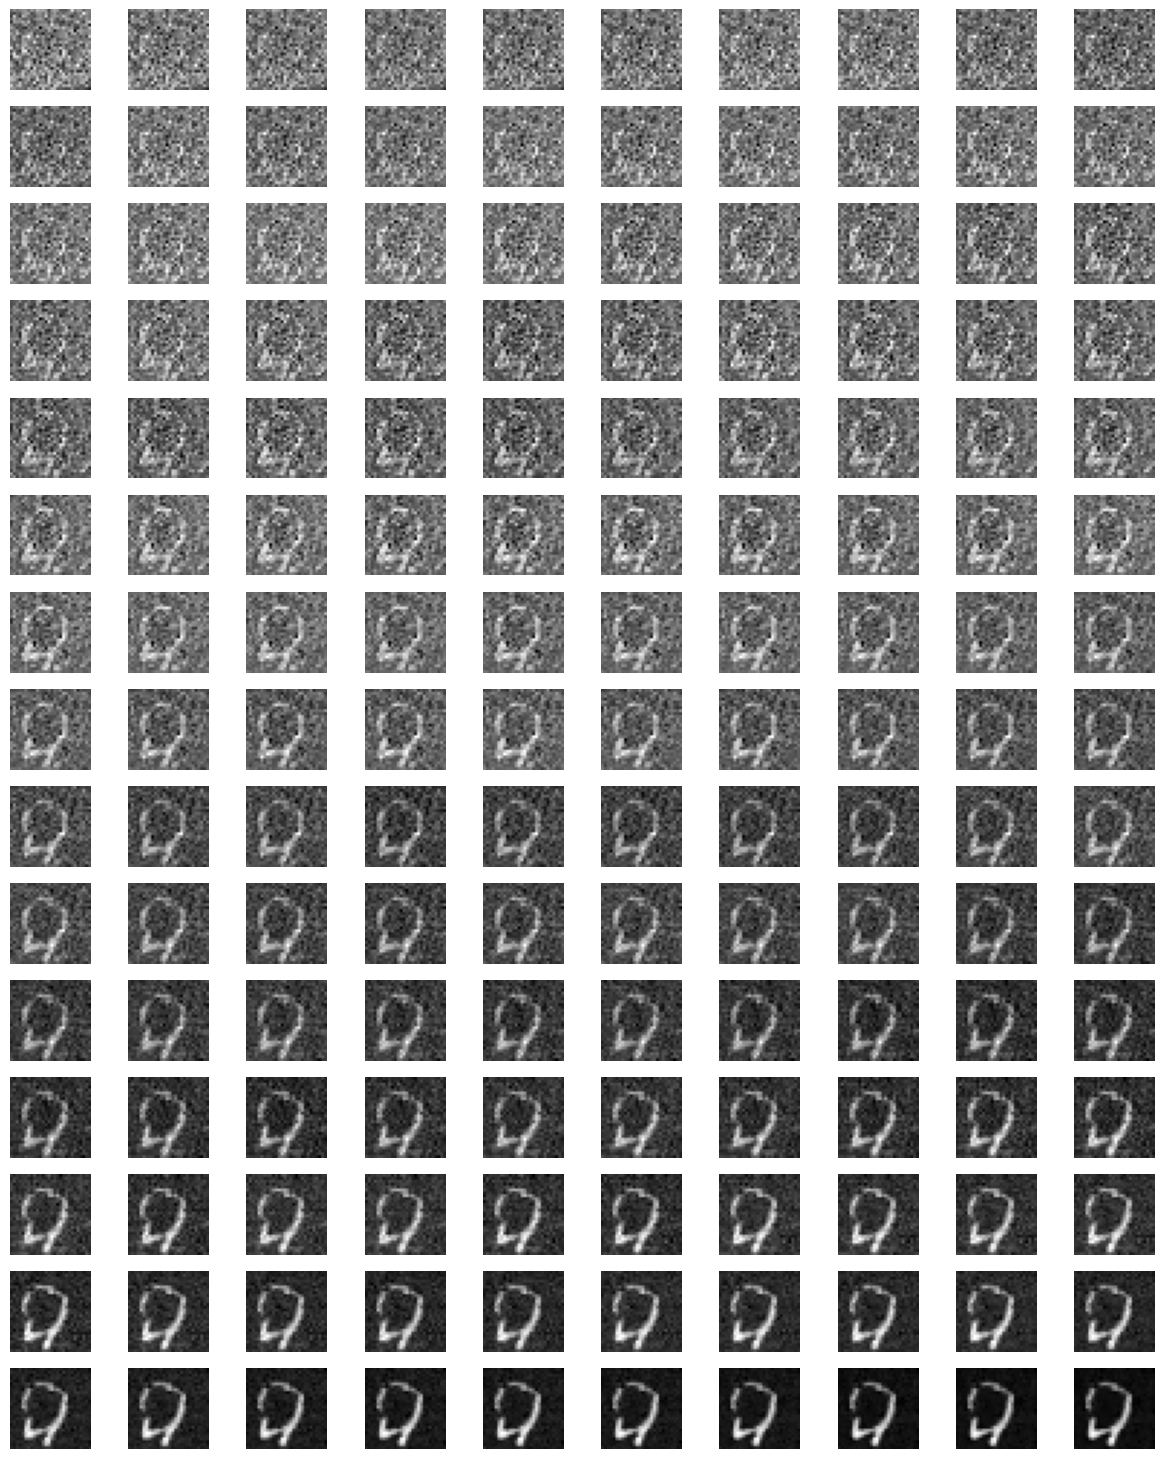

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,25))

single = x_ts[:, 0, :, :]

for t in range(scheduler.T):
    img = single[t].squeeze()
    ax = plt.subplot(20, 10, t + 1)
    ax.axis("off")
    plt.imshow(img, cmap="gray")

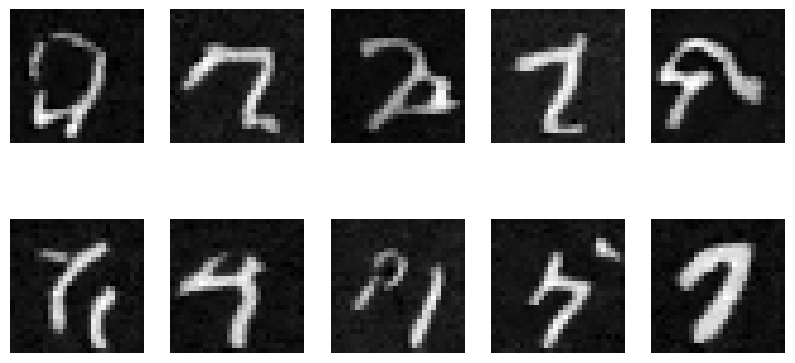

In [47]:
import matplotlib.pyplot as plt

example = x_ts[-1]

plt.figure(figsize=(10, 5))
for i in range(10):
    img = example[i][0]
    ax = plt.subplot(2, 5, i + 1)
    ax.axis('off')
    plt.imshow(img, cmap='gray')

Obviously the results are not great, because we only trained a very small model on a few epochs, but feel free to adjust the hyperparameters however you want. You'll notice that as you increase the number of epochs and the size of the model, you'll get significantly better results.

We built a lot of this from scratch. Surely someone has done this process for us already? Yes, they have! The `diffusion` library is a PyTorch library that implements the diffusion process and provides a lot of utilities to make the process easier.